# Model Evaluation

## 어떤 모델이 좋은 모델인가?

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import numpy as np

In [3]:
from IPython.display import Image
width=800; height=500
dir_path = r'D:\ASSIST\img'

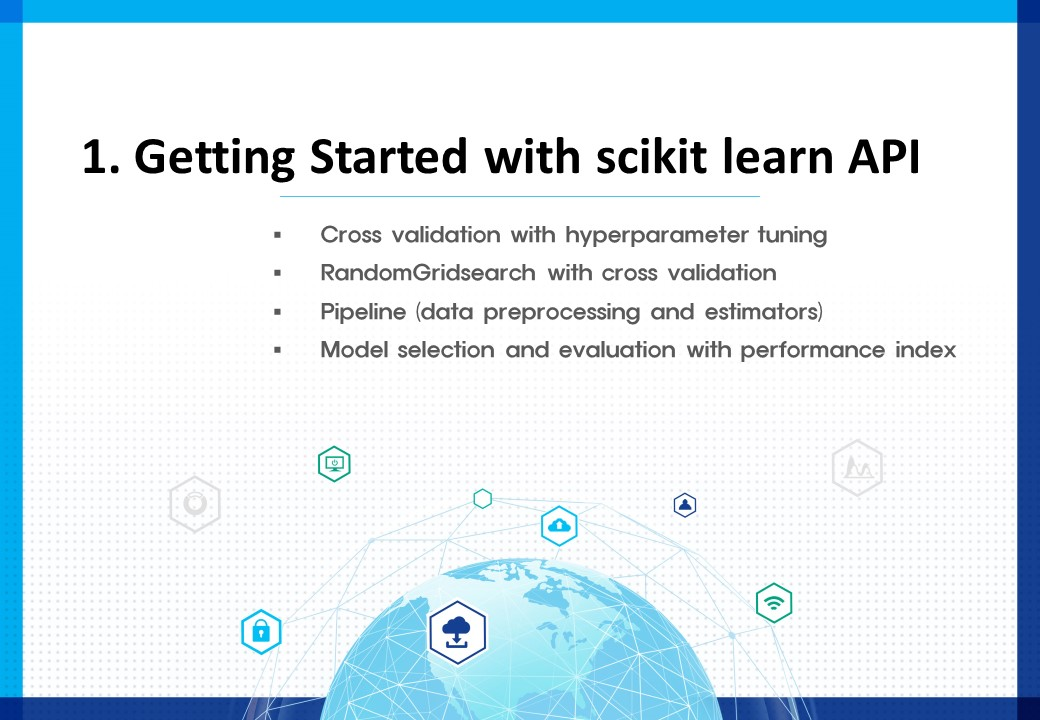

In [4]:
Image(filename=dir_path + '/슬라이드27.jpg', width=width, height=height)

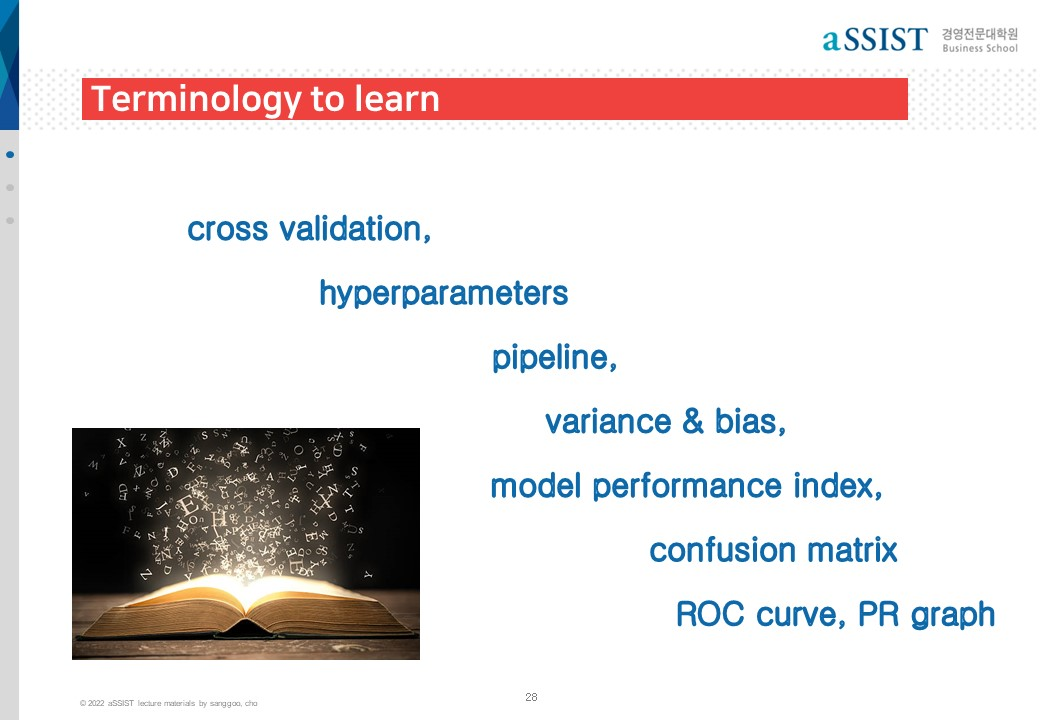

In [5]:
Image(filename=dir_path + '/슬라이드28.jpg', width=width, height=height)

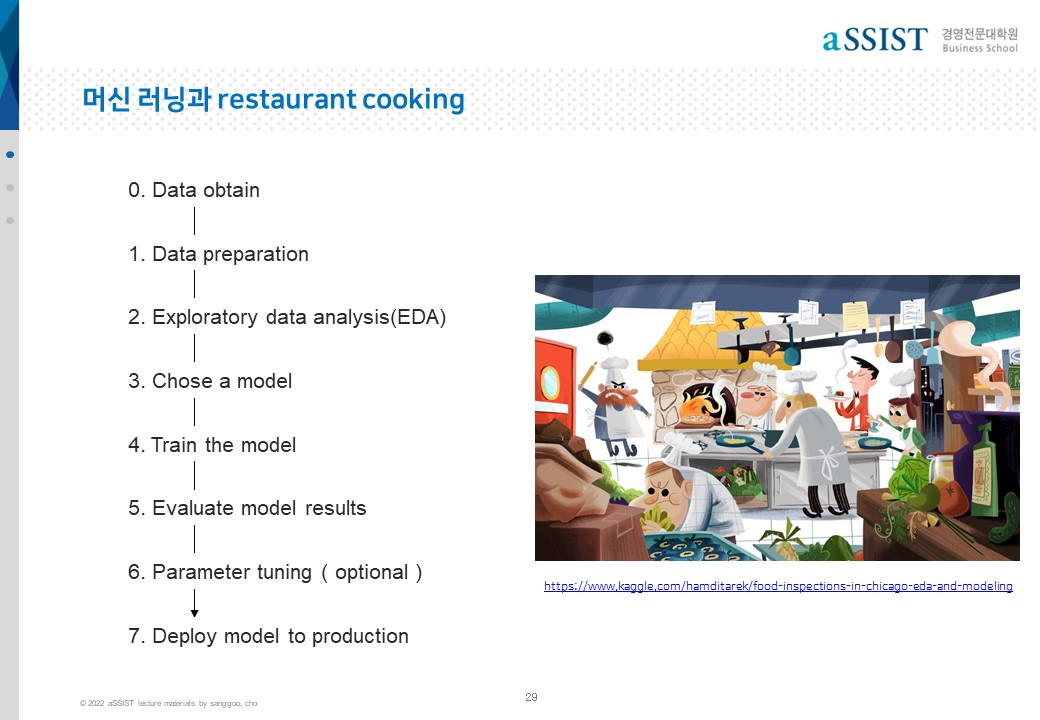

In [6]:
Image(filename=dir_path + '/슬라이드29.jpg', width=width, height=height)

## Confusion matrix with recall & precision

In [80]:
y_true = ['pos', 'pos','pos','pos','pos','pos','pos','pos','pos','pos','pos','pos',
         'neg', 'neg','neg','neg','neg','neg','neg','neg','neg','neg']
y_pred = ['pos', 'pos','pos','pos','pos','neg','neg','neg','neg','neg','neg','neg',
         'neg', 'neg','neg','neg','neg','neg','neg','pos','pos','pos']

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[7, 3],
       [7, 5]], dtype=int64)

<AxesSubplot:>

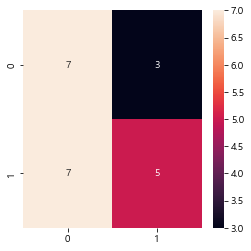

In [82]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)

In [5]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

(7, 3, 7, 5)

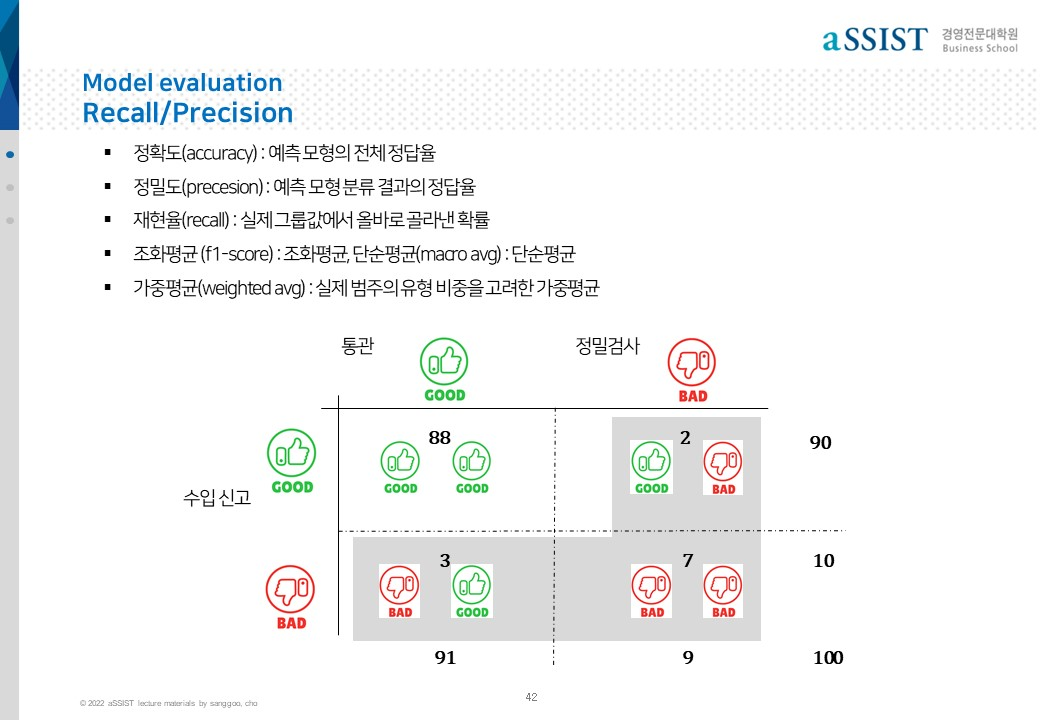

In [3]:
Image(filename=dir_path + '/슬라이드42.jpg', width=width, height=height)

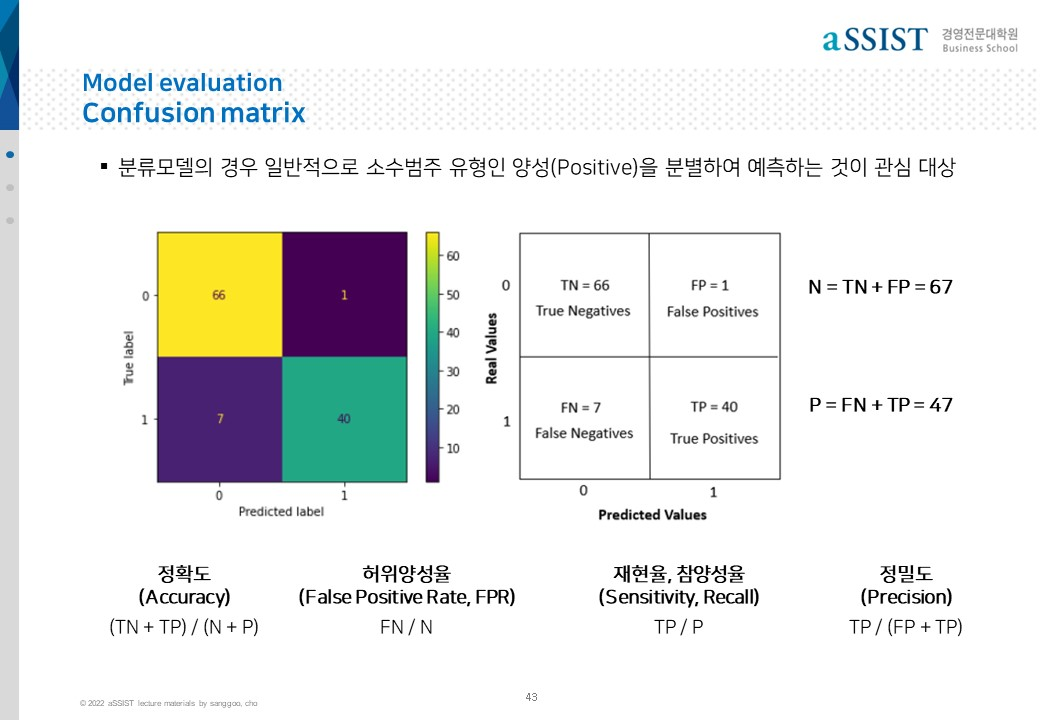

In [4]:
Image(filename=dir_path + '/슬라이드43.jpg', width=width, height=height)

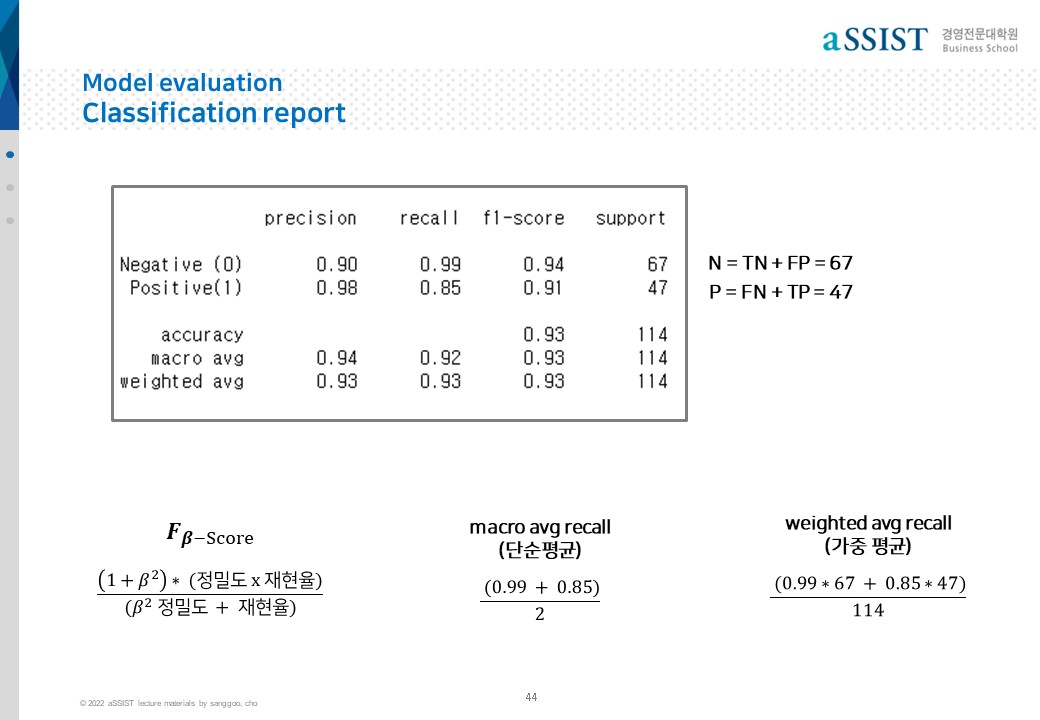

In [5]:
Image(filename=dir_path + '/슬라이드44.jpg', width=width, height=height)

https://en.wikipedia.org/wiki/Precision_and_recall
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' height=300 width=300>

In [6]:
from sklearn.metrics import classification_report
target_names = ['class 0(negative)', 'class 1(positive)']
print(classification_report(y_true, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

class 0(negative)       0.50      0.70      0.58        10
class 1(positive)       0.62      0.42      0.50        12

         accuracy                           0.55        22
        macro avg       0.56      0.56      0.54        22
     weighted avg       0.57      0.55      0.54        22



# Import the dataset Wisconsin breast cancer dataset from skelarn.

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer = pd.DataFrame(np.c_[cancer['target'], cancer['data']], 
                      columns = np.append('target', cancer['feature_names']))
cancer['target'] = cancer['target'].map({0.0: 1, 1.0:0}).astype('int64')
cancer.shape
cancer.head()
cancer.target.value_counts(normalize=True) #cancer.target.value_counts().plot(kind='bar', rot='360')

(569, 31)

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


0    0.627417
1    0.372583
Name: target, dtype: float64

#### 층화 추출

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [13]:
# Separate the independent variables from the dependent variable.
X = cancer.drop('target', axis = 1)
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
clf = SVC(random_state=0, probability=True)
clf.fit(X_train, y_train)

SVC(probability=True, random_state=0)

## confusion_matrix

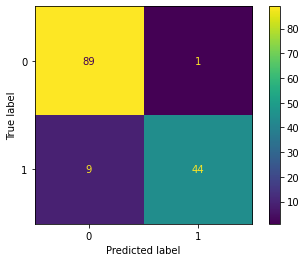

array([[89,  1],
       [ 9, 44]], dtype=int64)

<AxesSubplot:>

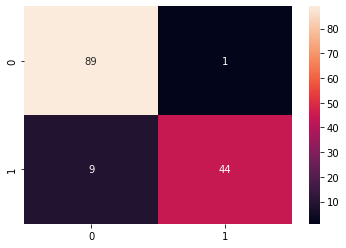

In [14]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
plot_confusion_matrix(clf, X_test, y_test);plt.show()
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt="d")

### classification_report

In [15]:
from sklearn.metrics import classification_report
target_names = ['생존(0)', '사망(1)']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       생존(0)       0.91      0.99      0.95        90
       사망(1)       0.98      0.83      0.90        53

    accuracy                           0.93       143
   macro avg       0.94      0.91      0.92       143
weighted avg       0.93      0.93      0.93       143



### 예측 모형의 성능지표 이해하기

- **허위** 음성과 **허위** 양성은 **잘못** 분류
- **실제** 음성과 **실제** 양성은 **올바로** 분류
- **정확도**는 올바로 분류된 비율

> $\frac{\text{true samples}}{\text{total samples}}$

- **정밀도**는 올바르게 분류된 **예측** 양성의 비율

> $\frac{\text{true positives}}{\text{true positives + false positives}}$

- **재현율**은 올바르게 분류된 **실제** 양성의 비율

> $\frac{\text{true positives}}{\text{true positives + false negatives}}$

- **AUC**는 ROC-AUC(Area Under the Curve of a Receiver Operating Characteristic) 곡선을 의미.
- **AUPRC**는 PR curve AUC를 의미. 이 메트릭은 다양한 확률 임계값에 대한 정밀도-재현율 pair

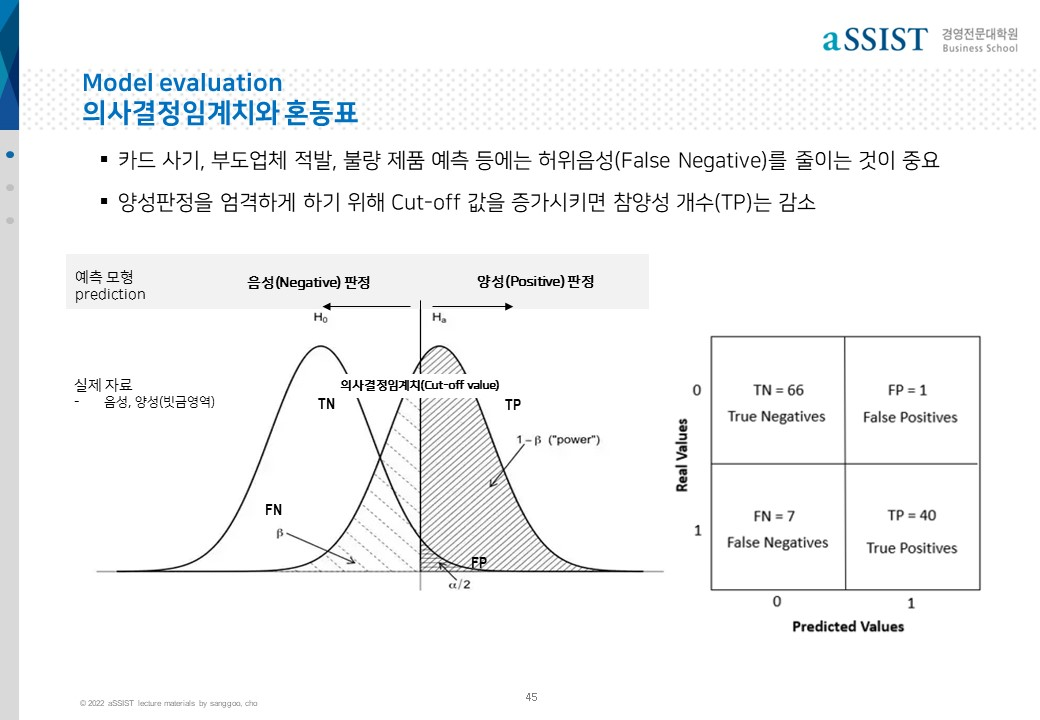

In [8]:
Image(filename=dir_path + '/슬라이드45.jpg', width=width, height=height)

### manual calculation

In [16]:
cm = confusion_matrix(y_test, y_pred)
print(f'정확도(accuracy): {(cm * np.eye(2)).sum() / cm.sum():.3f}')
print(f'정밀도(precision): {((cm * np.eye(2)).sum(axis=0) / cm.sum(axis=0)).round(3)}')
precision = (cm * np.eye(2)).sum(axis=0) / cm.sum(axis=0)
print(f'검측율(recall): {((cm * np.eye(2)).sum(axis=1) / cm.sum(axis=1)).round(3)}')
recall = (cm * np.eye(2)).sum(axis=1) / cm.sum(axis=1)
print(f'f1-score(Harmonic mean): {((2 / (1 / precision + 1 / recall))).round(3)}')

정확도(accuracy): 0.930
정밀도(precision): [0.908 0.978]
검측율(recall): [0.989 0.83 ]
f1-score(Harmonic mean): [0.947 0.898]


In [43]:
# 0일 확률, 1일 확률
y_probas = clf.predict_proba(X_test)
y_probas[0:10]
n = len(y_probas)
threshhold = np.linspace(0,1,n)
y_pred = y_probas[:,1].reshape(-1,1) > threshhold.reshape(1,-1)
y_pred.shape

array([[3.76796579e-06, 9.99996232e-01],
       [8.85468732e-01, 1.14531268e-01],
       [8.63579569e-01, 1.36420431e-01],
       [8.93773390e-01, 1.06226610e-01],
       [7.90447446e-01, 2.09552554e-01],
       [9.76891709e-01, 2.31082913e-02],
       [9.81544705e-01, 1.84552947e-02],
       [9.78905823e-01, 2.10941772e-02],
       [9.68385682e-01, 3.16143178e-02],
       [2.61464867e-01, 7.38535133e-01]])

(143, 143)

In [46]:
y_pred
y_pred.astype('int')

array([[ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

array([[1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [41]:
y_pred[:, 0]
y_pred[:, 142]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

              precision    recall  f1-score   support

       생존(0)       1.00      0.43      0.60        90
       사망(1)       0.51      1.00      0.68        53

    accuracy                           0.64       143
   macro avg       0.75      0.72      0.64       143
weighted avg       0.82      0.64      0.63       143



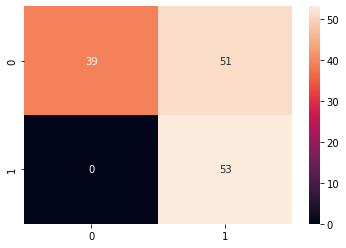

****************************************************************************************************
              precision    recall  f1-score   support

       생존(0)       0.83      1.00      0.91        90
       사망(1)       1.00      0.66      0.80        53

    accuracy                           0.87       143
   macro avg       0.92      0.83      0.85       143
weighted avg       0.90      0.87      0.87       143



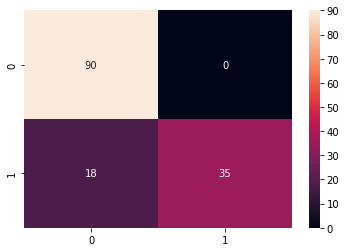

****************************************************************************************************


In [19]:
def threshhold_matrix(y_test, y_pred):   
    target_names = ['생존(0)', '사망(1)']
    cm = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names=target_names))
    sns.heatmap(cm, annot = True, fmt="d"); plt.show()
    print('*'*100)

threshhold_matrix(y_test, y_pred[:,4])
threshhold_matrix(y_test, y_pred[:,140])

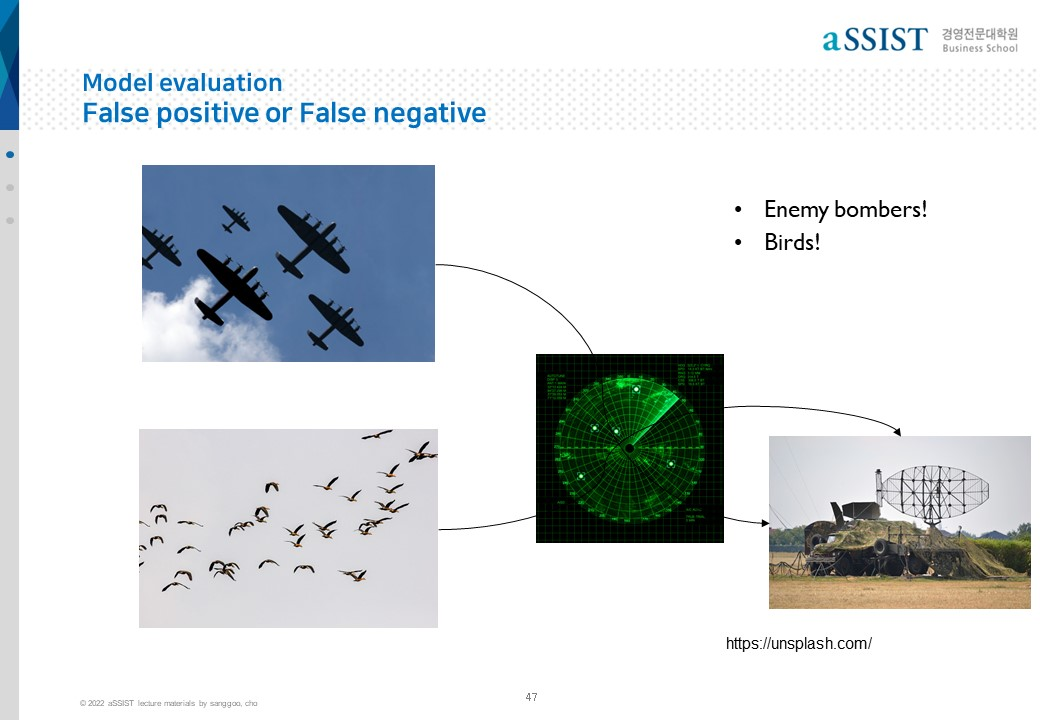

In [10]:
Image(filename=dir_path + '/슬라이드47.jpg', width=width, height=height)

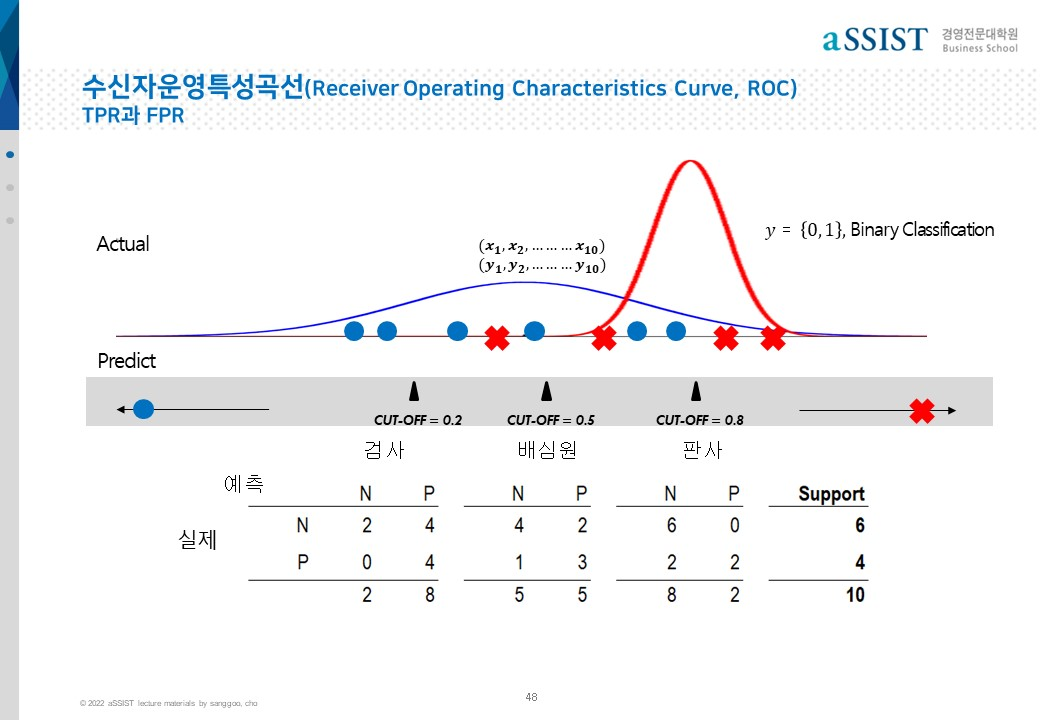

In [12]:
Image(filename=dir_path + '/슬라이드48.jpg', width=width, height=height)

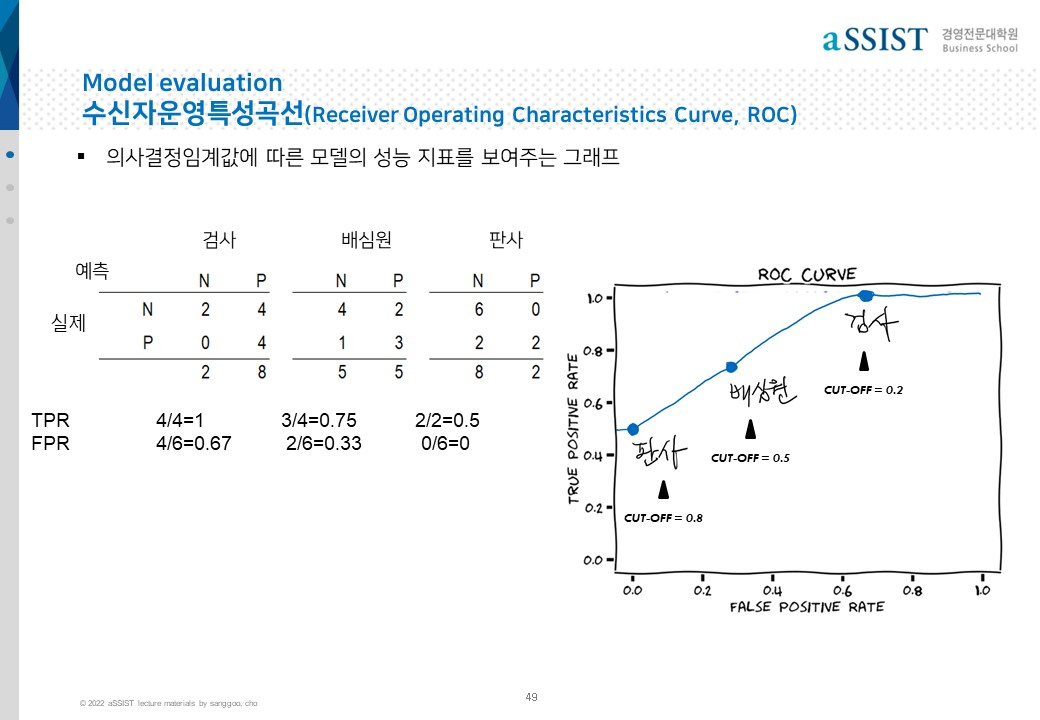

In [13]:
Image(filename=dir_path + '/슬라이드49.jpg', width=width, height=height)

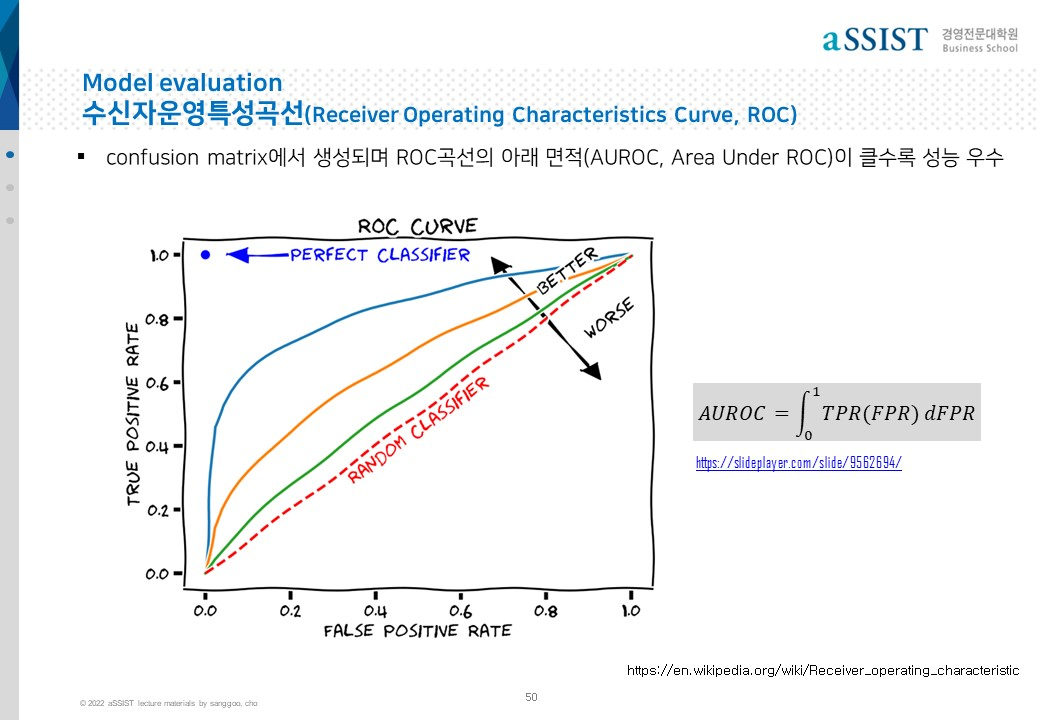

In [14]:
Image(filename=dir_path + '/슬라이드50.jpg', width=width, height=height)

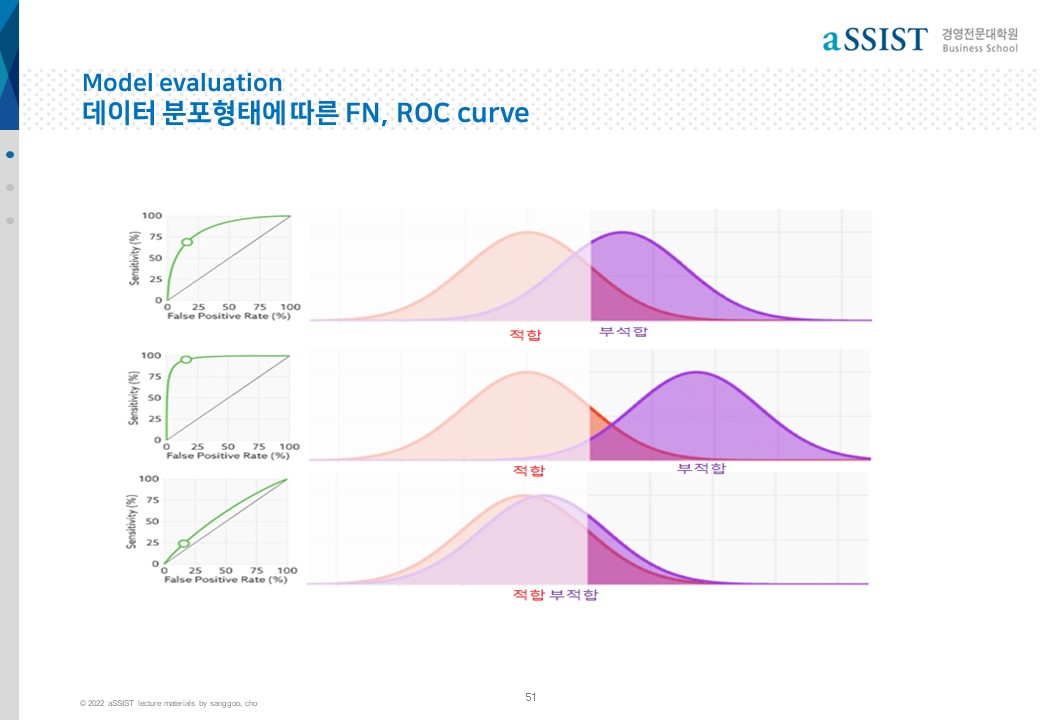

In [15]:
Image(filename=dir_path + '/슬라이드51.jpg', width=width, height=height)

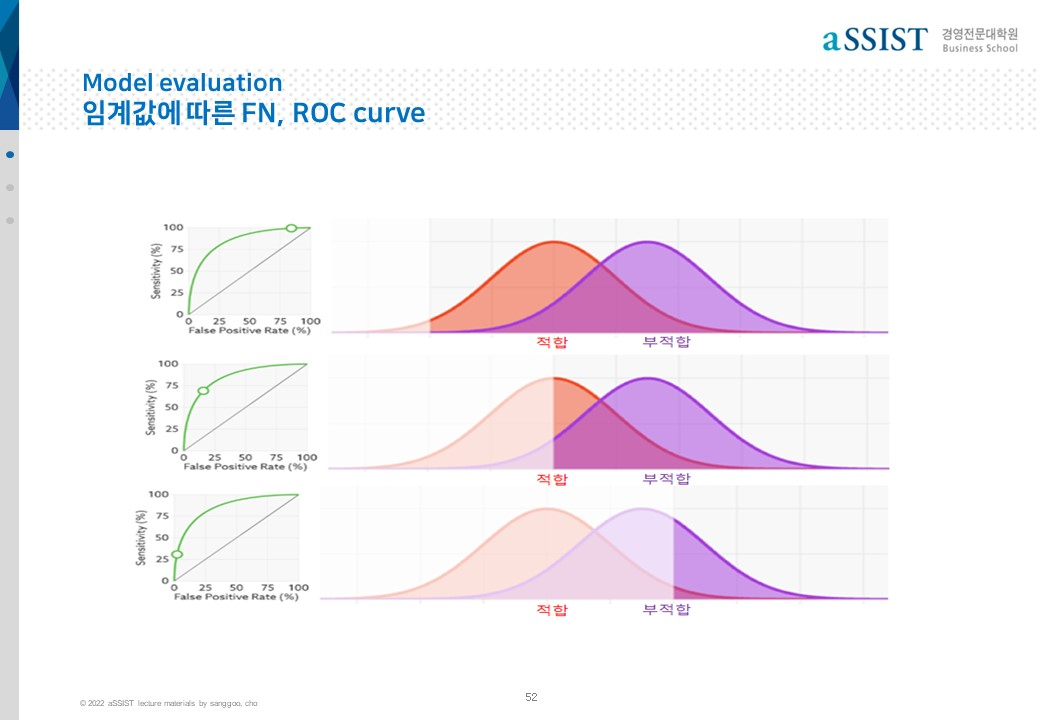

In [16]:
Image(filename=dir_path + '/슬라이드52.jpg', width=width, height=height)

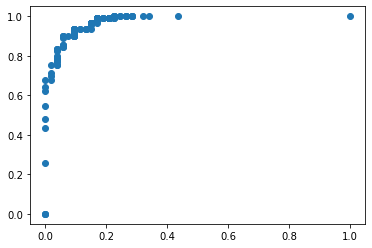

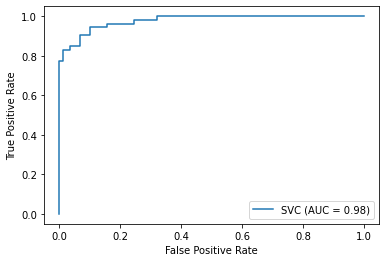

In [20]:
tpr = []; fpr = []
for i in range(n):
    cm = confusion_matrix(y_test, y_pred[:,i])
    tpr.append(cm[0,0]/cm.sum(axis=1)[0])
    fpr.append(cm[1,0]/cm.sum(axis=1)[1])
plt.scatter(fpr, tpr); plt.show()

from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test)  

In [24]:
((clf.predict_proba(X_test)[:,1] >= 0.3) == y_test).mean()
((clf.predict_proba(X_test)[:,1] >= 0.5) == y_test).mean()
((clf.predict_proba(X_test)[:,1] >= 0.8) == y_test).mean()

0.9090909090909091

0.9230769230769231

0.916083916083916

### roc_auc_score 
#### roc 아래의 면적 / 넓으면(1에 가까우면) 좋음

In [25]:
from sklearn.metrics import roc_auc_score
y_score = clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_score)

0.9775681341719078

### precision_recall_curve
#### th 변화에 따른 두 값의 변화

### average_precision_score

In [26]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print(f'Average precision-recall score: {average_precision:0.2f}')

Average precision-recall score: 0.97


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.97')

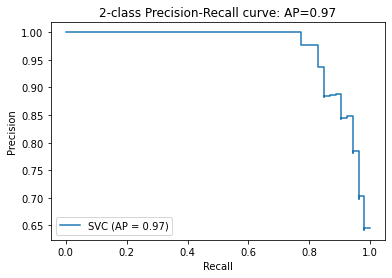

In [27]:
from sklearn.metrics import plot_precision_recall_curve, average_precision_score
disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

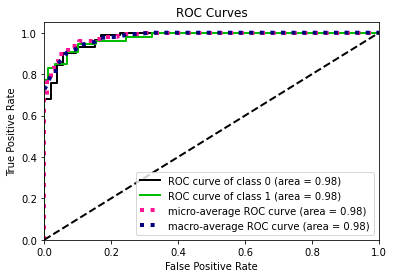

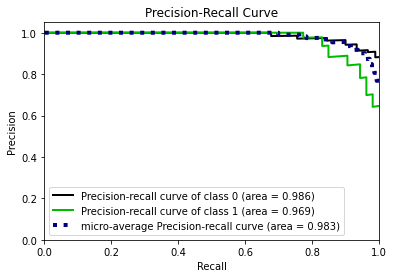

In [28]:
import scikitplot as skplt 
skplt.metrics.plot_roc(y_test, y_probas)
skplt.metrics.plot_precision_recall(y_test, y_probas)

In [29]:
from sklearn.metrics import precision_recall_curve

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probas[:, 1])
scores = [np.sum(to_labels(y_probas[:, 1], t))/len(y_probas[:, 1]) for t in thresholds]

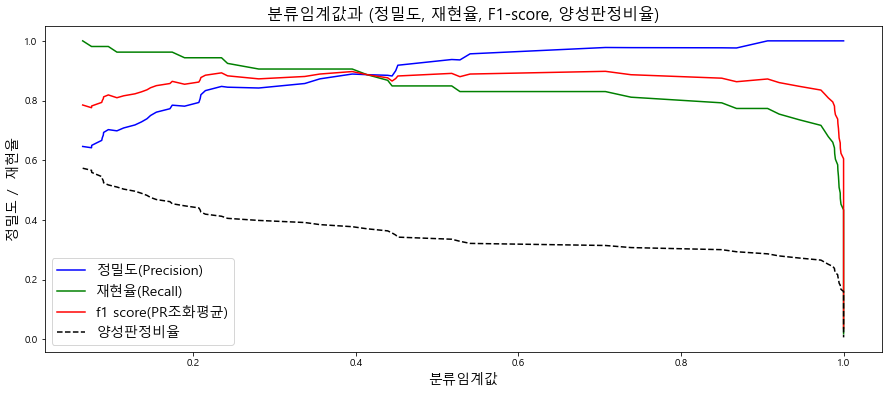

In [30]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.rcParams["figure.figsize"] = (15,6)
    plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
    plt.title('분류임계값과 (정밀도, 재현율, F1-score, 양성판정비율)', fontsize='16') 
    plt.plot(thresholds, precisions[:-1], 'b-', label='정밀도(Precision)') # 판사
    plt.plot(thresholds, recalls[:-1], 'g-', label='재현율(Recall)') # 검사
    plt.plot(thresholds, (2*precisions[:-1]*recalls[:-1])/(precisions[:-1] +recalls[:-1]), 
             'r-', label='f1 score(PR조화평균)') # 변호사
    plt.plot(thresholds, scores, 'k--', label='양성판정비율') # q-ratio
    plt.ylabel('정밀도 /  재현율', fontsize='14') 
    plt.xlabel('분류임계값', fontsize='14') 
    plt.legend(loc='best', fontsize='14') 
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

## f1-score가 최대인 threshold?

In [31]:
from sklearn.metrics import f1_score
scores = [f1_score(y_test, to_labels(y_probas[:, 1], t)) for t in thresholds]
ix = np.argmax(scores)
print(f'Threshold(분류임계값)={thresholds[ix]:.3f}, at Maximum F-measure={scores[ix]:.3f}')

Threshold(분류임계값)=0.707, at Maximum F-measure=0.898


### plot_lift_curve / plot_cumulative_gain
- lift: the ratio between the results obtained with and without the predictive model
- cumulative_gain: percentage of the overall number of cases in a given category "gained" by targeting a percentage of the total number of cases

In [32]:
plt.rcParams["figure.figsize"] = (4,4)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

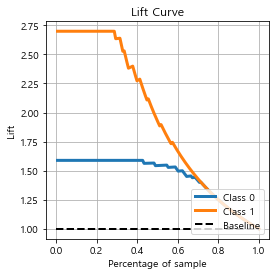

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

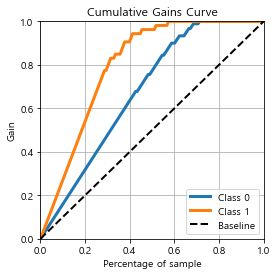

In [33]:
skplt.metrics.plot_lift_curve(y_test, y_probas); plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)

## 1.1.3. Probalistic Metrics

### brier_score_loss
#### mean square error 값과 동일

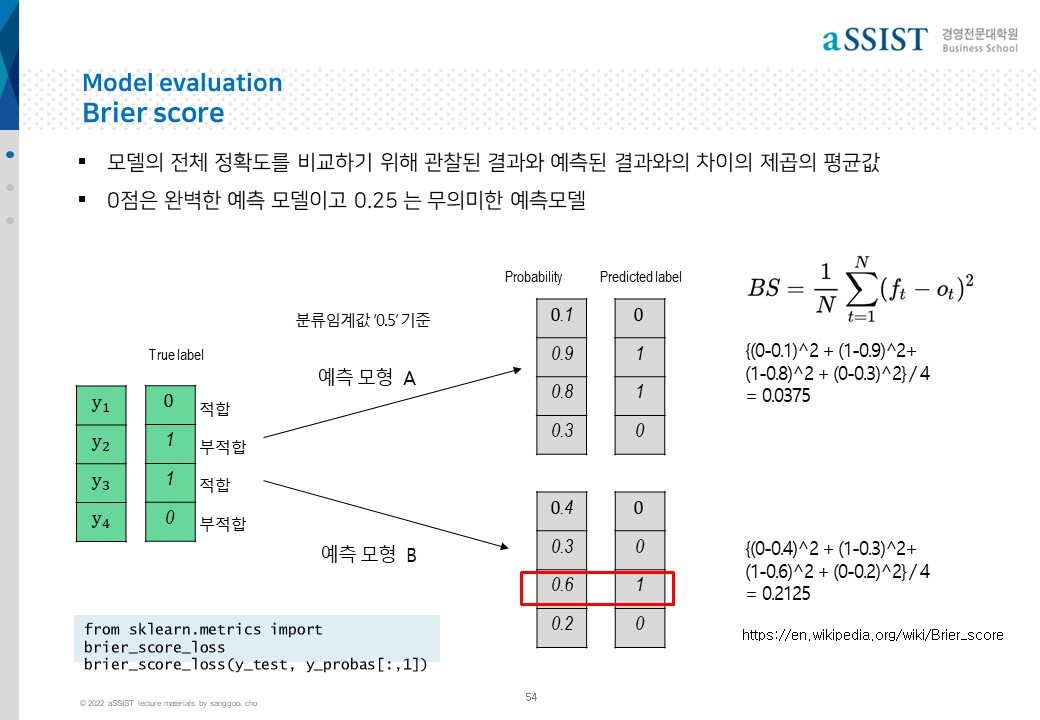

In [17]:
Image(filename=dir_path + '/슬라이드54.jpg', width=width, height=height)

In [34]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, y_score)
brier_score_loss(y_test, y_probas[:, 1])

0.05393556118435772

0.05393556118435772

### log_loss
- Log Loss is the negative average of the log of corrected predicted probabilities for each instance
- 예측된 확률과 실제값의 차이의 log 값은 1에 가까울 수록 0에 근접
<img src ='https://editor.analyticsvidhya.com/uploads/90149Capture0.PNG'>

In [35]:
from sklearn.metrics import log_loss
log_loss(y_test, y_probas)

0.17809166281948552

### matthews_corrcoef
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/33f3d62224f97cdef8bc559ee455c3f4815f5788">

- MCC is defined identically to Pearson's phi coefficient
- unbalanced 상황에서 잘 맞음

In [36]:
from sklearn.metrics import matthews_corrcoef
y_pred = clf.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.8518535291230603

### cohen_kappa_score
- Cohen's kappa measures the agreement between two raters
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1a7a8f738ea187a60443bac93cd53b4d9d6b2231">

In [37]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.8453050627434011

## Calibration plot

  0%|          | 0/3 [00:00<?, ?it/s]

<AxesSubplot:title={'center':'Calibration plots (Reliability Curves)'}, xlabel='Mean predicted value', ylabel='Fraction of positives'>

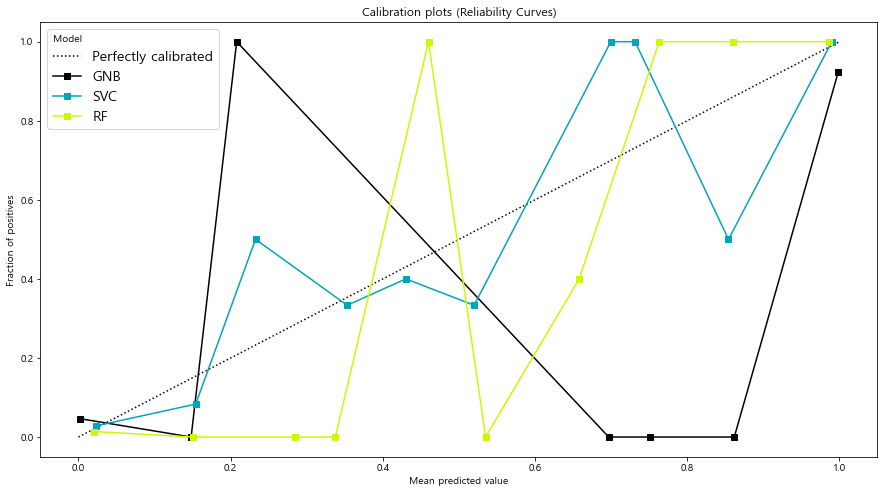

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier) 
from sklearn.preprocessing import StandardScaler

classifiers = {}
classifiers.update({'GNB': GaussianNB()})
#classifiers.update({'LGR': LogisticRegression(class_weight='balanced')})
classifiers.update({'SVC': SVC(probability=True)})
classifiers.update({'RF': RandomForestClassifier(n_estimators=100)})

from tqdm import tqdm_notebook
classifier_labels = []
probas_list = []
for classifier_label, classifier in tqdm_notebook(classifiers.items()):
    y_proba = classifier.fit(X_train, y_train).predict_proba(X_test)
    probas_list.append(y_proba)
    classifier_labels.append(classifier_label)

skplt.metrics.plot_calibration_curve(y_test, probas_list, classifier_labels, figsize=(15,8))
leg = plt.legend(title='Model', fontsize = 14)
leg._legend_box.align = 'left'

<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

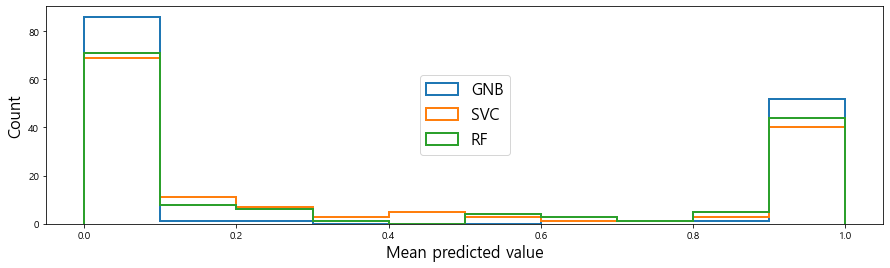

In [49]:
plt.figure(figsize=(15,4))
for name, classifier in classifiers.items():
    y_proba = classifier.fit(X_train, y_train).predict_proba(X_test)
    ax = plt.hist(y_proba[:,1], range=(0, 1), bins=10, label=name, histtype="step", lw=2)
    plt.xlabel("Mean predicted value", fontsize=16); plt.ylabel("Count",fontsize=16)
    plt.legend(fontsize=16, loc='center' )

<Figure size 720x720 with 0 Axes>

GaussianNB()

(array([86.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1., 52.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [<matplotlib.patches.Polygon at 0x2154c809850>])

SVC(probability=True)

(array([70., 10.,  7.,  3.,  5.,  3.,  0.,  2.,  2., 41.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [<matplotlib.patches.Polygon at 0x2154c809d00>])

RandomForestClassifier()

(array([72.,  6.,  5.,  3.,  0.,  3.,  5.,  3.,  2., 44.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [<matplotlib.patches.Polygon at 0x2154daf57f0>])

Text(0, 0.5, 'Fraction of positives')

(-0.05, 1.05)

Text(0.5, 1.0, 'Calibration plots  (reliability curve)')

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

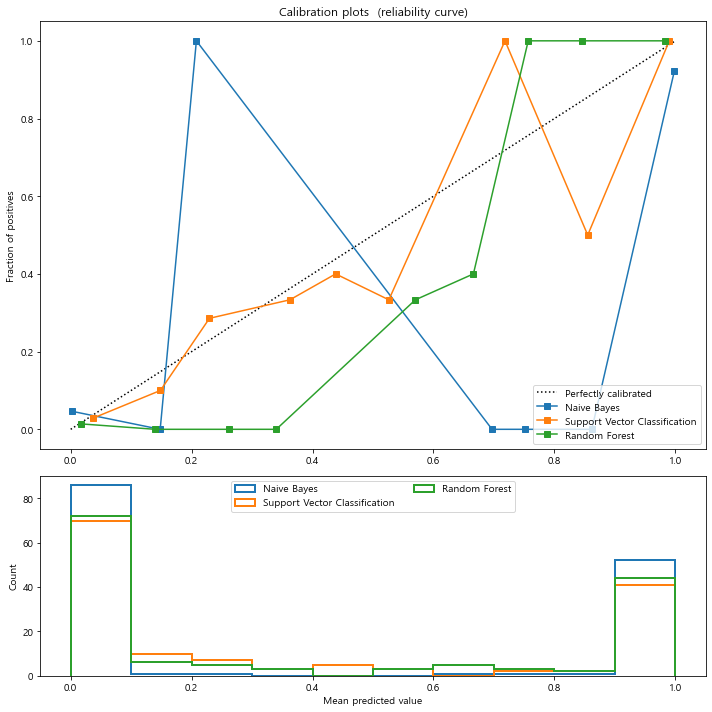

In [52]:
from sklearn.calibration import calibration_curve
# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC(probability=True)
rfc = RandomForestClassifier()


# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [#(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

Naive Bayes:
	Brier: 0.071
	Precision: 0.873
	Recall: 0.906
	F1: 0.889

Naive Bayes + Isotonic:
	Brier: 0.057
	Precision: 0.810
	Recall: 0.962
	F1: 0.879

Naive Bayes + Sigmoid:
	Brier: 0.066
	Precision: 0.873
	Recall: 0.906
	F1: 0.889

SVC:
	Brier: 0.054
	Precision: 0.978
	Recall: 0.830
	F1: 0.898

SVC + Isotonic:
	Brier: 0.057
	Precision: 0.887
	Recall: 0.887
	F1: 0.887

SVC + Sigmoid:
	Brier: 0.056
	Precision: 0.957
	Recall: 0.849
	F1: 0.900



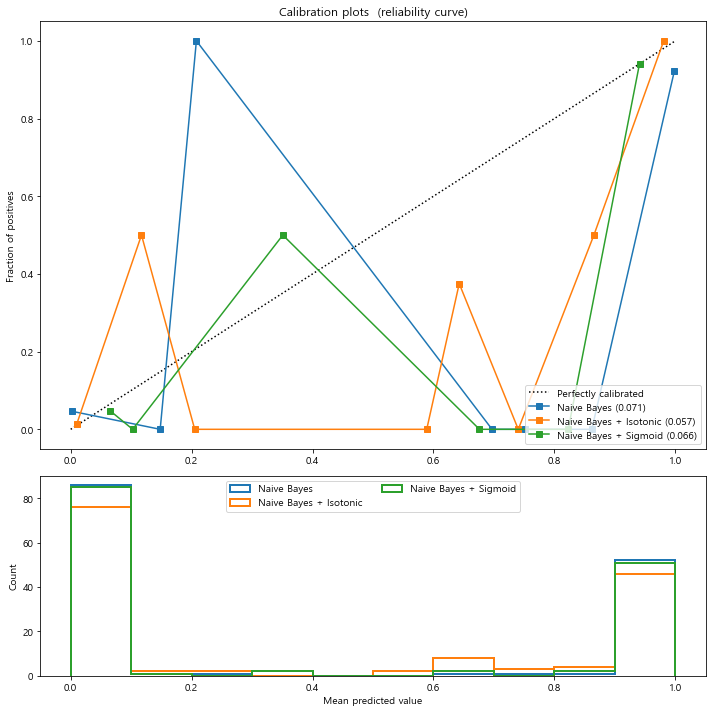

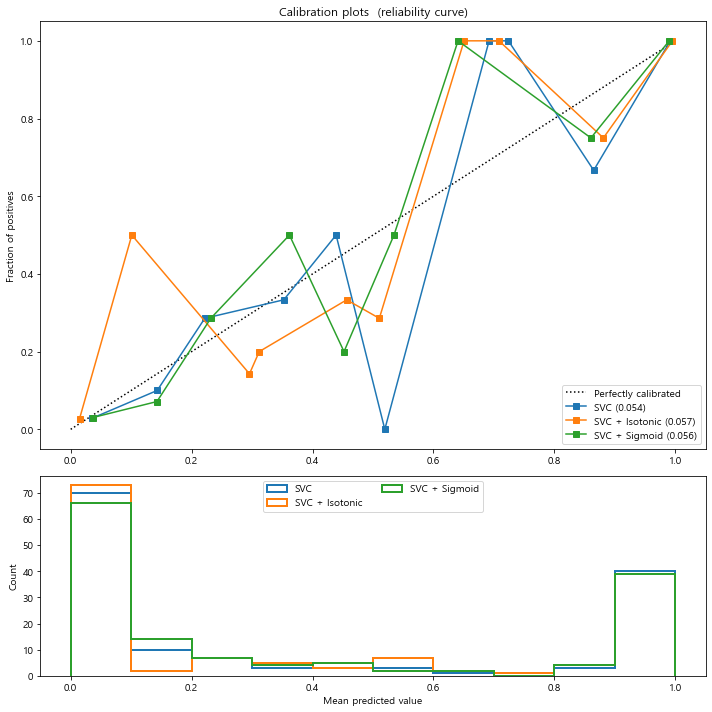

In [54]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score)
def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')

    # Logistic regression with no calibration as baseline
    lr = LogisticRegression(C=1.)

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [#(lr, 'Logistic'),
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()

# Plot calibration curve for Gaussian Naive Bayes
plot_calibration_curve(GaussianNB(), "Naive Bayes", 1)

# Plot calibration curve for Linear SVC
plot_calibration_curve(SVC(probability=True), "SVC", 2)

plt.show()

### 실습 breast_cancer

In [55]:
# Import the dataset Wisconsin breast cancer dataset from skelarn.
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

# Create a DataFrame.
cancer = pd.DataFrame(np.c_[cancer['target'], cancer['data']], 
                      columns = np.append('target', cancer['feature_names']))

# Assign the label 0 to benign samples and 1 to malignant samples
# change the datatype of target from float to integer.
cancer['target'] = cancer['target'].map({0.0: 1, 1.0:0}).astype('int64')
# Check the structure of the dataset
cancer

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [56]:
cancer['target'].value_counts(normalize=True)

0    0.627417
1    0.372583
Name: target, dtype: float64

In [57]:
# Separate the independent variables from the dependent variable.
X = cancer.drop('target', axis = 1)
y = cancer['target']
# Divide the dataset into train (80%) and test (20%).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

SVC(probability=True, random_state=0)

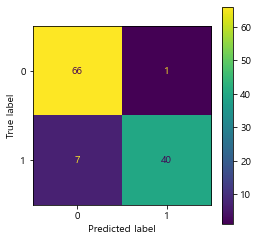

In [58]:
from sklearn.svm import SVC
clf = SVC(random_state=0, probability = True)
clf.fit(X_train, y_train)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

array([[66,  1],
       [ 7, 40]], dtype=int64)

<AxesSubplot:>

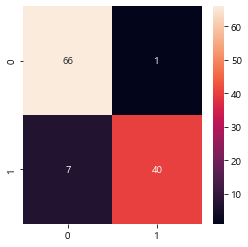

In [59]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [60]:
from sklearn.metrics import classification_report
target_names = ['Negative(0)', 'Positive(1)']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.90      0.99      0.94        67
 Positive(1)       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [61]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
target_names = ['Negative(0)', 'Positive(1)']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.90      0.99      0.94        67
 Positive(1)       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



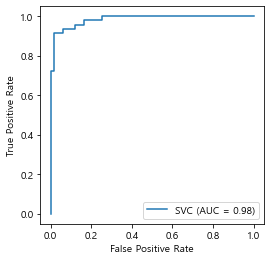

In [62]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test)  
plt.show()

In [63]:
# 0일 확률, 1일 확률
clf.predict_proba(X_test)

array([[4.47190021e-01, 5.52809979e-01],
       [9.32056319e-01, 6.79436813e-02],
       [9.06245895e-01, 9.37541050e-02],
       [6.26383128e-01, 3.73616872e-01],
       [9.71464229e-01, 2.85357711e-02],
       [9.65569742e-01, 3.44302584e-02],
       [9.73985585e-01, 2.60144153e-02],
       [9.70308447e-01, 2.96915528e-02],
       [9.55855313e-01, 4.41446874e-02],
       [9.76665840e-01, 2.33341602e-02],
       [6.68061451e-01, 3.31938549e-01],
       [6.99722136e-01, 3.00277864e-01],
       [9.73952199e-01, 2.60478011e-02],
       [1.14557359e-01, 8.85442641e-01],
       [6.90059522e-01, 3.09940478e-01],
       [2.88773708e-02, 9.71122629e-01],
       [9.68514766e-01, 3.14852341e-02],
       [1.78786592e-07, 9.99999821e-01],
       [5.02048260e-03, 9.94979517e-01],
       [2.45950428e-07, 9.99999754e-01],
       [1.96470240e-01, 8.03529760e-01],
       [9.92370856e-02, 9.00762914e-01],
       [9.13800043e-01, 8.61999569e-02],
       [9.49010708e-01, 5.09892923e-02],
       [5.386627

In [64]:
clf.predict_proba(X_test).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [66]:
y_test

512    1
457    0
439    0
298    0
37     0
      ..
213    1
519    0
432    1
516    1
500    0
Name: target, Length: 114, dtype: int64

In [67]:
((clf.predict_proba(X_test)[:,1] >= 0.5) == y_test).mean()

0.9385964912280702

In [68]:
from sklearn.metrics import roc_auc_score
y_score = clf.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_score)

0.9844395046046364

In [69]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.98


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.98')

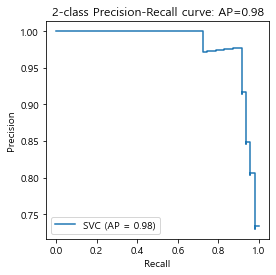

In [70]:
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ' 'AP={0:0.2f}'.format(average_precision))

In [71]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, y_score)


0.04665283092042529

In [72]:
y_probas = clf.predict_proba(X_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

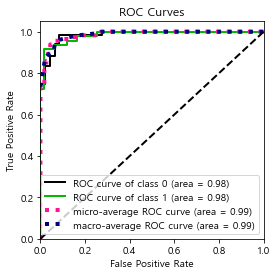

In [73]:
import scikitplot as skplt 
skplt.metrics.plot_roc(y_test, y_probas)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

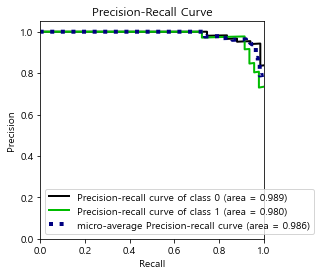

In [74]:
skplt.metrics.plot_precision_recall(y_test, y_probas)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

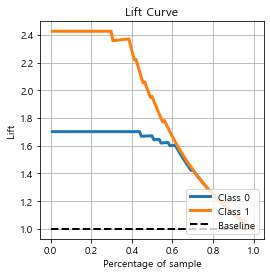

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

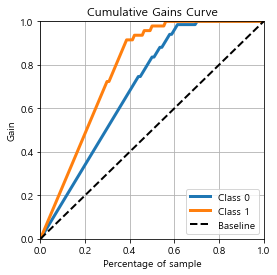

In [75]:
skplt.metrics.plot_lift_curve(y_test, y_probas); plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

KstestResult(statistic=0.05263157894736842, pvalue=0.9976688849230171)

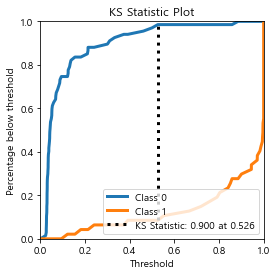

In [76]:
skplt.metrics.plot_ks_statistic(y_test, y_probas)
from scipy.stats import ks_2samp
ks_2samp(y_test, y_pred)

In [77]:
from sklearn.metrics import log_loss
log_loss(y_test, y_probas)


0.163637239565042

In [78]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)


0.8576521296725972

In [79]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.8523794108125606

# End